MSBA 503 - Final Project
NAME: EVA KERRY, MAI PHAM

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

#Exploratory data

##Load data

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
apartment_for_rent_classified = fetch_ucirepo(id=555)

# data (as pandas dataframes)
X = apartment_for_rent_classified.data.features
y = apartment_for_rent_classified.data.targets

# metadata
print(apartment_for_rent_classified.metadata)

# variable information
print(apartment_for_rent_classified.variables)


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

In [4]:
df = pd.concat([X, y], axis=1)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,2195.0,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",1250.0,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,1395.0,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",1600.0,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",975.0,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [6]:
df.shape

(99826, 21)

In [7]:
df = df.drop(columns=['currency', 'price_display', 'latitude', 'longitude', 'time', 'price_type', 'source', 'address'])

In [8]:
df['state'].value_counts()

,count
state,
TX,11279
CA,10341
VA,8305
NC,6308
CO,6295
FL,5788
MD,5309
MA,5041
OH,4911


##Narrow data scope to California state df_ca

In [9]:
df_ca = df[df['state'] == 'CA']

# Save the filtered dataset if needed
df_ca.to_csv('filtered_california_listings.csv', index=False)

# Display the filtered DataFrame
df_ca.head()

,category,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,No,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,No,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
9,housing/rent/apartment,Two BR 10201 Remmet Avenue,"This unit is located at 10201 Remmet Avenue, C...",NaN,2,2,No,Thumbnail,NaN,2150.0,1005,Chatsworth,CA
28,housing/rent/apartment,Three BR 3 Mill Ridge Farm,"This unit is located at three Mill Ridge Farm,...",NaN,2.5,3,No,Thumbnail,"Cats,Dogs",3250.0,1525,Ladera Ranch,CA
39,housing/rent/apartment,Three BR 636 Villa Centre Way,"This unit is located at 636 Villa Centre Way, ...",NaN,2.5,3,No,Thumbnail,NaN,3990.0,1739,San Jose,CA


In [10]:
df_ca.shape

(10341, 13)

##Data preprocessing

In [11]:
df_ca.isnull().sum()

,0
category,0
title,0
body,0
amenities,1894
bathrooms,3
bedrooms,54
fee,0
has_photo,0
pets_allowed,6892
price,0


In [12]:
# prompt: download df_ca as excel

# Assuming df_ca is already defined as in your provided code.
# If not, execute your provided code first to create the df_ca DataFrame.

# Save the DataFrame to an Excel file
df_ca.to_excel('df_ca.xlsx', index=False)  # index=False prevents row numbers from being written

###Amenities features

In [13]:
df_ca['amenities'].value_counts()

,count
amenities,
Parking,523
"Gym,Pool",279
"Parking,Storage",203
Pool,164
Wood Floors,115
...,...
"Parking,Refrigerator,Tennis",1
"AC,Dishwasher,Gated,Wood Floors",1
"Elevator,Fireplace,Gated,Gym,Parking,Pool,Wood Floors",1


In [14]:
# Clean and standardize the 'amenities' column
df_ca['amenities'] = df_ca['amenities'].str.lower().str.strip()


<ipython-input-14-555f2777fca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['amenities'] = df_ca['amenities'].str.lower().str.strip()


In [15]:
# Split the amenities into a list of individual features
df_ca['amenities_list'] = df_ca['amenities'].str.split(',')


<ipython-input-15-2324c31b3b37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['amenities_list'] = df_ca['amenities'].str.split(',')


In [16]:
from collections import Counter

# Flatten the amenities lists and count occurrences
all_amenities = [amenity.strip() for sublist in df_ca['amenities_list'].dropna() for amenity in sublist]
amenities_count = Counter(all_amenities)

# Convert to a DataFrame for analysis
amenities_df = pd.DataFrame(amenities_count.items(), columns=['Amenity', 'Count']).sort_values(by='Count', ascending=False)

# Display top amenities
print(amenities_df.head(10))


         Amenity  Count
2        parking   4323
3           pool   4010
17           gym   3243
10    patio/deck   2752
18            ac   1986
23  washer dryer   1970
1     dishwasher   1731
0   refrigerator   1726
8          gated   1682
14       storage   1537


<ipython-input-17-f4777901fa4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=amenities_df.head(10), x='Count', y='Amenity', palette='viridis')


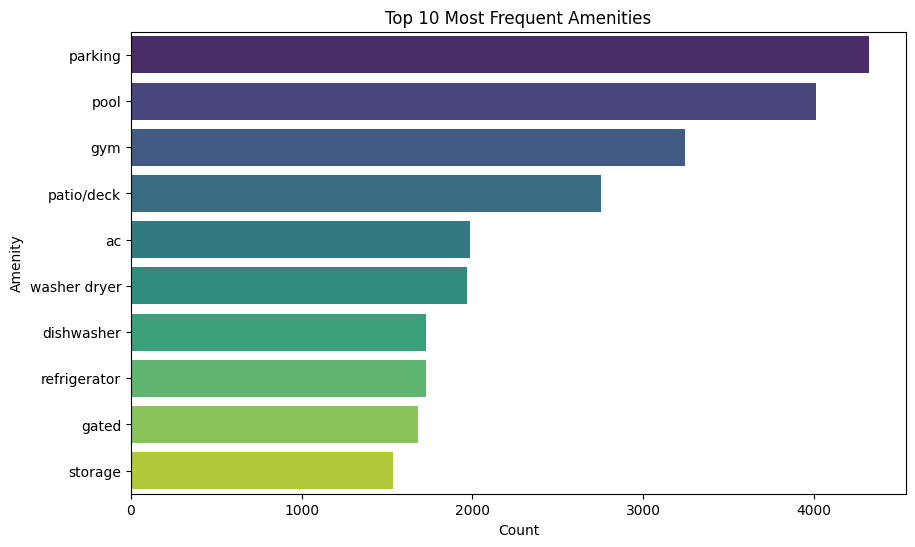

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 most frequent amenities
plt.figure(figsize=(10, 6))
sns.barplot(data=amenities_df.head(10), x='Count', y='Amenity', palette='viridis')
plt.title('Top 10 Most Frequent Amenities')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.show()


<ipython-input-27-bedf4b5fc884>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca[amenity] = df_ca['amenities_list'].apply(lambda x: 1 if isinstance(x, list) and amenity in x else 0)


Amenity Frequency (%) by Cluster:
               washer dryer      gated         ac  internet access    tennis  \
price_cluster                                                                  
High Price        19.025875  16.666667  21.841705        11.770675  3.627600   
Low Price         21.441662  19.242517  22.235797         7.574832  8.918754   
Medium Price      18.091267  15.381052  16.284457         7.319898  7.644197   

               refrigerator    luxury  basketball   doorman  patio/deck  \
price_cluster                                                             
High Price        20.573313  0.177575    1.674277  0.177575   27.422628   
Low Price         13.866830  0.183262    5.986561  0.000000   24.251680   
Medium Price      14.199676  0.324299    4.169562  0.000000   26.152421   

                  alarm  clubhouse        tv      view  fireplace  \
price_cluster                                                       
High Price     0.152207   9.512938  4.160325  3.348

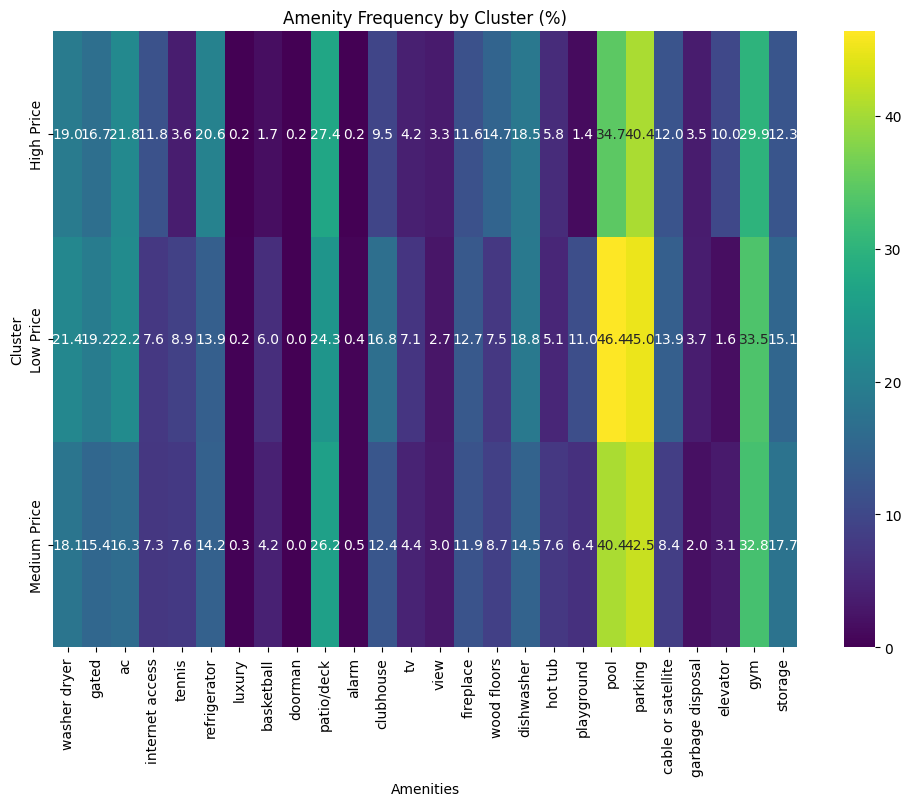

In [27]:
unique_amenities = set(amenity.strip() for sublist in df_ca['amenities_list'].dropna() for amenity in sublist)

# Create binary columns for each unique amenity
for amenity in unique_amenities:
    df_ca[amenity] = df_ca['amenities_list'].apply(lambda x: 1 if isinstance(x, list) and amenity in x else 0)

# Calculate amenity frequency by cluster
amenity_columns = list(unique_amenities)  # Use the created binary amenity columns
amenity_frequency = df_ca.groupby('price_cluster')[amenity_columns].mean() * 100

# Display the frequency table
print("Amenity Frequency (%) by Cluster:")
print(amenity_frequency)

# Visualize the frequencies using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(amenity_frequency, annot=True, fmt='.1f', cmap='viridis')
plt.title('Amenity Frequency by Cluster (%)')
plt.xlabel('Amenities')
plt.ylabel('Cluster')
plt.show()

###Has photo to photo available

In [19]:
# Map values to binary
df_ca["photo_available"] = df["has_photo"].map({"Yes": 1, "Thumbnail": 1, "No": 0})

print(df_ca)

                     category  \
0      housing/rent/apartment   
3      housing/rent/apartment   
9      housing/rent/apartment   
28     housing/rent/apartment   
39     housing/rent/apartment   
...                       ...   
99743  housing/rent/apartment   
99762  housing/rent/apartment   
99767  housing/rent/apartment   
99823  housing/rent/apartment   
99825  housing/rent/apartment   

                                                   title  \
0                             One BR 507 & 509 Esplanade   
3                                  Two BR 209 Aegean Way   
9                             Two BR 10201 Remmet Avenue   
28                            Three BR 3 Mill Ridge Farm   
39                         Three BR 636 Villa Centre Way   
...                                                  ...   
99743  One BR Apartment - a newly acquired community ...   
99762  One BR - Solis - 206 - Perfect for couples loo...   
99767               Two BR Two BA in Beautiful Bay Park!   
998

<ipython-input-19-3ad36acb022d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca["photo_available"] = df["has_photo"].map({"Yes": 1, "Thumbnail": 1, "No": 0})


###Price

In [20]:
# Calculate the IQR (Interquartile Range)
Q1 = df_ca['price'].quantile(0.25)  # 25th percentile
Q3 = df_ca['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_ca = df_ca[(df_ca['price'] >= lower_bound) & (df_ca['price'] <= upper_bound)]

# Check the updated DataFrame
print(f"Outliers removed. Data now has {df_ca.shape[0]} rows.")


Outliers removed. Data now has 9896 rows.


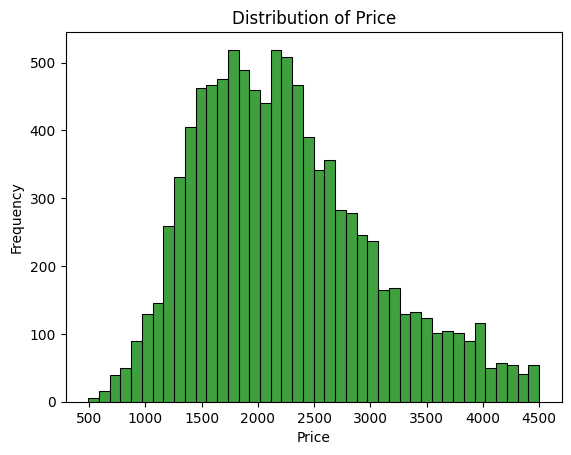

In [21]:
sns.histplot(data = df_ca, x = 'price', color = 'green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [22]:
from scipy.stats import skew

# Calculate skewness
price_skewness = skew(df_ca['price'])
print(f"Skewness of price: {price_skewness}")


Skewness of price: 0.6235321441837902


<ipython-input-23-3d64ef309438>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['sqrt_price'] = np.sqrt(df_ca['price'])


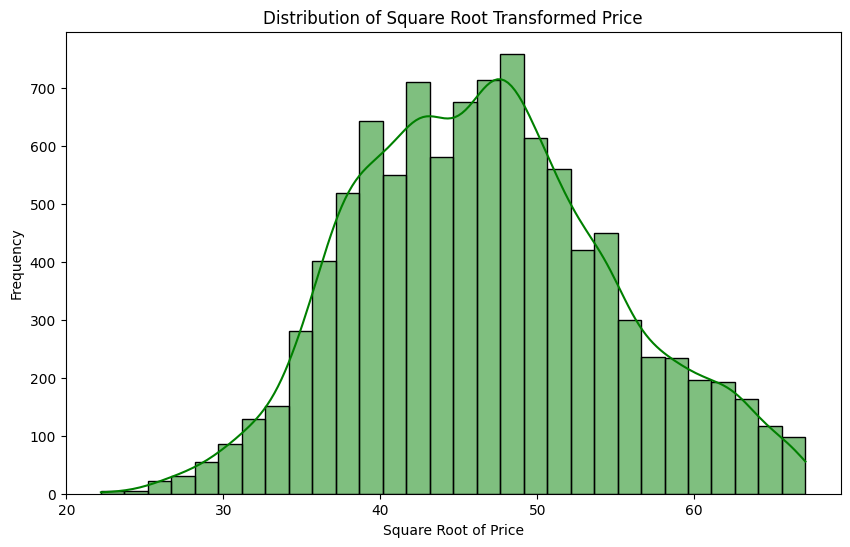

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply square root transformation
df_ca['sqrt_price'] = np.sqrt(df_ca['price'])

# Visualize the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_ca['sqrt_price'], kde=True, color='green', bins=30)
plt.title('Distribution of Square Root Transformed Price')
plt.xlabel('Square Root of Price')
plt.ylabel('Frequency')
plt.show()


###Fee

In [24]:
df_ca['fee'].value_counts()

,count
fee,
No,9892
Yes,4


In [25]:
# Convert 'fee' column to binary and store in a new column 'has_fee'
df_ca['has_fee'] = df_ca['fee'].map({'Yes': 1, 'No': 0})

# Check the updated column
print(df_ca[['fee', 'has_fee']].head())


   fee  has_fee
0   No        0
3   No        0
9   No        0
28  No        0
39  No        0


<ipython-input-25-e4b622ad624d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['has_fee'] = df_ca['fee'].map({'Yes': 1, 'No': 0})


#Analysis: Clustering and Linear Regression

##Price cluster

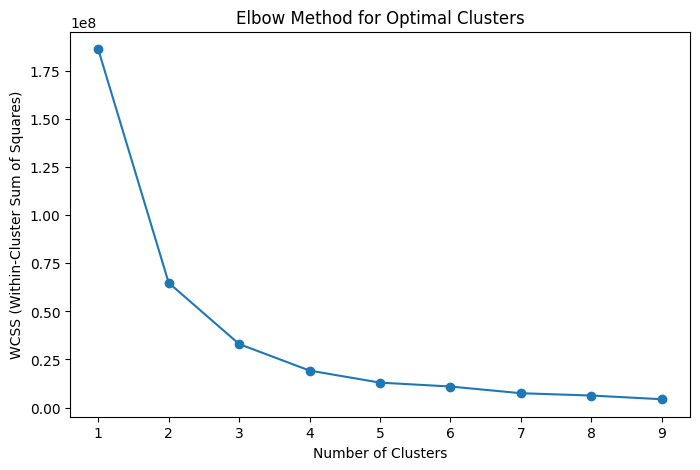

<ipython-input-26-0f82e46f0957>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['price_cluster'] = df_ca['cityname'].map(price_cluster_map)
<ipython-input-26-0f82e46f0957>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary_named.index, y=cluster_summary_named.values, palette='viridis')


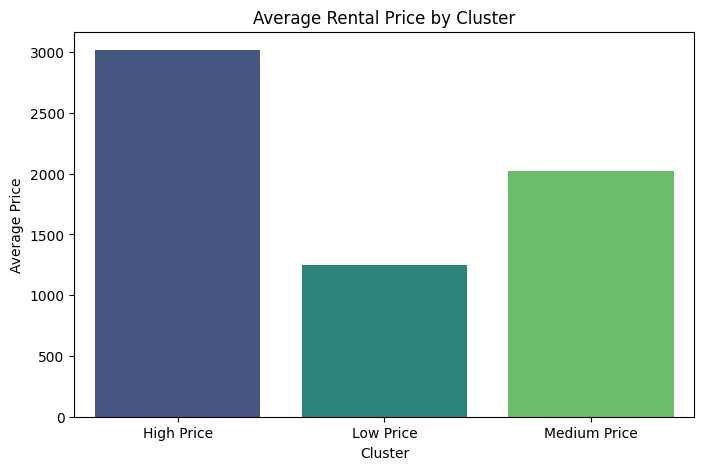

price_cluster_named
High Price      3017.662252
Low Price       1252.393782
Medium Price    2020.904011
Name: avg_price, dtype: float64
         cityname   price price_cluster
0   Redondo Beach  2195.0    High Price
3       Vacaville  1600.0  Medium Price
9      Chatsworth  2150.0  Medium Price
28   Ladera Ranch  3250.0  Medium Price
39       San Jose  3990.0    High Price


In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the average rental price for each city
city_features = df_ca.groupby('cityname')['price'].mean().reset_index()
city_features.rename(columns={'price': 'avg_price'}, inplace=True)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 10):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(city_features[['avg_price']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Step 3: Apply K-Means clustering with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
city_features['price_cluster'] = kmeans.fit_predict(city_features[['avg_price']])

# Step 4: Rename clusters for better interpretation
cluster_labels = {0: 'Medium Price', 1: 'High Price', 2: 'Low Price'}
city_features['price_cluster_named'] = city_features['price_cluster'].map(cluster_labels)

# Step 5: Map clusters back to the original DataFrame
price_cluster_map = city_features.set_index('cityname')['price_cluster_named']
df_ca['price_cluster'] = df_ca['cityname'].map(price_cluster_map)

# Step 6: Visualize the average rental price by cluster
cluster_summary_named = city_features.groupby('price_cluster_named')['avg_price'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_summary_named.index, y=cluster_summary_named.values, palette='viridis')
plt.title('Average Rental Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Price')
plt.show()

# Step 7: Display renamed cluster summary
print(cluster_summary_named)

# Optional: Verify the original DataFrame with the new cluster column
print(df_ca[['cityname', 'price', 'price_cluster']].head())


##Linear Regression model by Cluster


Running regression for cluster: High Price
MAE: 480.2465708517217, MSE: 382881.84236888407, RMSE: 618.7744680971283, R2: 0.2883122802314606

Running regression for cluster: Medium Price
MAE: 339.71409308040904, MSE: 193385.93781908497, RMSE: 439.7566802438423, R2: 0.3924961705286867

Running regression for cluster: Low Price
MAE: 215.22576649612546, MSE: 82113.16109130622, RMSE: 286.55394098023885, R2: 0.2407214404940171

Overall Results by Cluster:
        Cluster         MAE            MSE        RMSE        R2
0    High Price  480.246571  382881.842369  618.774468  0.288312
1  Medium Price  339.714093  193385.937819  439.756680  0.392496
2     Low Price  215.225766   82113.161091  286.553941  0.240721


<ipython-input-28-cc9e8b6ddb78>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='R2', data=results_df, palette='coolwarm')


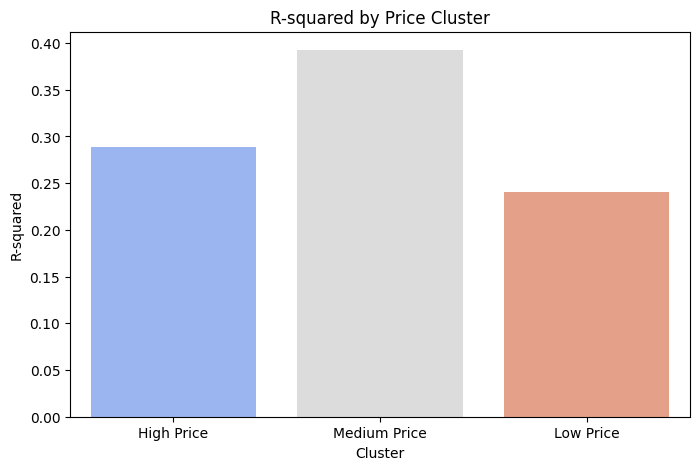

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target
features = ['square_feet', 'bathrooms', 'bedrooms']
target = 'price'

# Initialize results list
results = []

# Loop through each cluster
for cluster in df_ca['price_cluster'].unique():
    print(f"\nRunning regression for cluster: {cluster}")

    # Filter data for the current cluster
    cluster_data = df_ca[df_ca['price_cluster'] == cluster]

    # Check if enough data exists for the cluster
    if cluster_data.shape[0] < 10:
        print(f"Not enough data for cluster: {cluster}")
        continue

    # Define X (features) and y (target)
    X = cluster_data[features]
    y = cluster_data[target]

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
    X = pd.DataFrame(imputer.fit_transform(X), columns=features)

    # Split data into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Cluster': cluster,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    # Print evaluation metrics
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display overall results
print("\nOverall Results by Cluster:")
print(results_df)

# Optional: Visualize R-squared for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='R2', data=results_df, palette='coolwarm')
plt.title('R-squared by Price Cluster')
plt.xlabel('Cluster')
plt.ylabel('R-squared')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix


model = LinearRegression()
model.fit(X_scaled, y)  # y is your target variable
coefficients = pd.DataFrame({
    'Feature': features,  # List of feature names
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)


       Feature  Coefficient
0  square_feet   128.393369
1    bathrooms   105.831634
2     bedrooms   -41.313291


In [30]:
# convert to numeric
df_ca['square_feet'] = pd.to_numeric(df_ca['square_feet'], errors='coerce')
df_ca['bathrooms'] = pd.to_numeric(df_ca['bathrooms'], errors='coerce')
df_ca['bedrooms'] = pd.to_numeric(df_ca['bedrooms'], errors='coerce')
# drop na rows for bed and bath columns
df_ca.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)
# list null counts
df_ca.isnull().sum()

<ipython-input-30-85b7c0e98b96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['square_feet'] = pd.to_numeric(df_ca['square_feet'], errors='coerce')
<ipython-input-30-85b7c0e98b96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['bathrooms'] = pd.to_numeric(df_ca['bathrooms'], errors='coerce')
<ipython-input-30-85b7c0e98b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,0
category,0
title,0
body,0
amenities,1778
bathrooms,0
bedrooms,0
fee,0
has_photo,0
pets_allowed,6506
price,0


In [31]:
# Calculate summary statistics for each price cluster
summary_stats = df_ca.groupby('price_cluster')[['bathrooms', 'bedrooms', 'price', 'square_feet']].describe()
print("Summary Statistics by Price Cluster:")
print(summary_stats)


# Compare with other clusters
other_clusters_data = df_ca[df_ca['price_cluster'] != 'Low Price']
summary_comparison = other_clusters_data.groupby('price_cluster')[['price', 'square_feet', 'bathrooms', 'bedrooms']].mean()
print("\nComparison with Other Clusters:")
print(summary_comparison)

Summary Statistics by Price Cluster:
              bathrooms                                              bedrooms  \
                  count      mean       std  min  25%  50%  75%  max    count   
price_cluster                                                                   
High Price       3906.0  1.343446  0.510960  1.0  1.0  1.0  2.0  4.0   3906.0   
Low Price        1632.0  1.402574  0.522052  1.0  1.0  1.0  2.0  3.5   1632.0   
Medium Price     4303.0  1.471067  0.548263  1.0  1.0  1.0  2.0  4.5   4303.0   

                                                             price  \
                   mean       std  min  25%  50%  75%  max   count   
price_cluster                                                        
High Price     1.491551  0.687965  0.0  1.0  1.0  2.0  5.0  3906.0   
Low Price      1.689338  0.687764  0.0  1.0  2.0  2.0  5.0  1632.0   
Medium Price   1.704392  0.734674  0.0  1.0  2.0  2.0  8.0  4303.0   

                                                       

In [32]:
# Count the number of unique cities in each cluster
city_cluster_counts = df_ca.groupby('price_cluster')['cityname'].nunique()


# Display the city counts
print("Number of cities in each cluster:")
print(city_cluster_counts_named)

# Visualize the counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=city_cluster_counts_named.index, y=city_cluster_counts_named.values, palette='Set2')
plt.title('Number of Cities in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Cities')
plt.show()

Number of cities in each cluster:


NameError: name 'city_cluster_counts_named' is not defined

##Linear Regression model by Cluster + has photo


Running regression for cluster: High Price
MAE: 486.30436355007333, MSE: 518389.92856903863, RMSE: 719.993005916751, R2: 0.11275302745751148

Running regression for cluster: Medium Price
MAE: 342.24588532653166, MSE: 201913.21012514373, RMSE: 449.3475382431106, R2: 0.35545561297168293

Running regression for cluster: Low Price
MAE: 216.75396671324532, MSE: 84431.52216408498, RMSE: 290.57102774379445, R2: 0.27935650854872895

Overall Results by Cluster:
        Cluster         MAE            MSE        RMSE        R2
0    High Price  486.304364  518389.928569  719.993006  0.112753
1  Medium Price  342.245885  201913.210125  449.347538  0.355456
2     Low Price  216.753967   84431.522164  290.571028  0.279357


<ipython-input-33-4dd01ba87166>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='R2', data=results_df, palette='coolwarm')


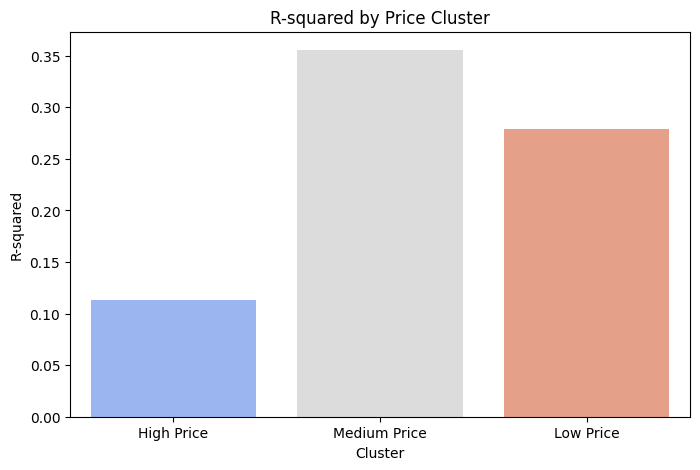

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target
features = ['square_feet', 'bathrooms', 'bedrooms', 'photo_available']
target = 'price'

# Initialize results list
results = []

# Loop through each cluster
for cluster in df_ca['price_cluster'].unique():
    print(f"\nRunning regression for cluster: {cluster}")

    # Filter data for the current cluster
    cluster_data = df_ca[df_ca['price_cluster'] == cluster]

    # Check if enough data exists for the cluster
    if cluster_data.shape[0] < 10:
        print(f"Not enough data for cluster: {cluster}")
        continue

    # Define X (features) and y (target)
    X = cluster_data[features]
    y = cluster_data[target]

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
    X = pd.DataFrame(imputer.fit_transform(X), columns=features)

    # Split data into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Cluster': cluster,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    # Print evaluation metrics
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display overall results
print("\nOverall Results by Cluster:")
print(results_df)

# Optional: Visualize R-squared for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='R2', data=results_df, palette='coolwarm')
plt.title('R-squared by Price Cluster')
plt.xlabel('Cluster')
plt.ylabel('R-squared')
plt.show()


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix


model = LinearRegression()
model.fit(X_scaled, y)  # y is your target variable
coefficients = pd.DataFrame({
    'Feature': features,  # List of feature names
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)


           Feature  Coefficient
0      square_feet   128.463907
1        bathrooms   106.087075
3  photo_available    -1.569738
2         bedrooms   -41.844673


In [35]:
# convert to numeric
df_ca['square_feet'] = pd.to_numeric(df_ca['square_feet'], errors='coerce')
df_ca['bathrooms'] = pd.to_numeric(df_ca['bathrooms'], errors='coerce')
df_ca['bedrooms'] = pd.to_numeric(df_ca['bedrooms'], errors='coerce')
# drop na rows for bed and bath columns
df_ca.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)
# list null counts
df_ca.isnull().sum()

<ipython-input-35-85b7c0e98b96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['square_feet'] = pd.to_numeric(df_ca['square_feet'], errors='coerce')
<ipython-input-35-85b7c0e98b96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['bathrooms'] = pd.to_numeric(df_ca['bathrooms'], errors='coerce')
<ipython-input-35-85b7c0e98b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,0
category,0
title,0
body,0
amenities,1778
bathrooms,0
bedrooms,0
fee,0
has_photo,0
pets_allowed,6506
price,0


In [36]:
# Calculate summary statistics for each price cluster
summary_stats = df_ca.groupby('price_cluster')[['bathrooms', 'bedrooms', 'price', 'square_feet']].describe()
print("Summary Statistics by Price Cluster:")
print(summary_stats)


# Compare with other clusters
other_clusters_data = df_ca[df_ca['price_cluster'] != 'Low Price']
summary_comparison = other_clusters_data.groupby('price_cluster')[['price', 'square_feet', 'bathrooms', 'bedrooms']].mean()
print("\nComparison with Other Clusters:")
print(summary_comparison)

Summary Statistics by Price Cluster:
              bathrooms                                              bedrooms  \
                  count      mean       std  min  25%  50%  75%  max    count   
price_cluster                                                                   
High Price       3906.0  1.343446  0.510960  1.0  1.0  1.0  2.0  4.0   3906.0   
Low Price        1632.0  1.402574  0.522052  1.0  1.0  1.0  2.0  3.5   1632.0   
Medium Price     4303.0  1.471067  0.548263  1.0  1.0  1.0  2.0  4.5   4303.0   

                                                             price  \
                   mean       std  min  25%  50%  75%  max   count   
price_cluster                                                        
High Price     1.491551  0.687965  0.0  1.0  1.0  2.0  5.0  3906.0   
Low Price      1.689338  0.687764  0.0  1.0  2.0  2.0  5.0  1632.0   
Medium Price   1.704392  0.734674  0.0  1.0  2.0  2.0  8.0  4303.0   

                                                       

##Linear Regression model by Cluster + has fee + has photo


Running regression for cluster: High Price
MAE: 486.30436355007333, MSE: 518389.92856903863, RMSE: 719.993005916751, R2: 0.11275302745751148

Running regression for cluster: Medium Price
MAE: 342.30426726353886, MSE: 201930.0131125171, RMSE: 449.3662349493085, R2: 0.3554019747219116

Running regression for cluster: Low Price
MAE: 216.75396671324532, MSE: 84431.52216408498, RMSE: 290.57102774379445, R2: 0.27935650854872895

Overall Results by Cluster:
        Cluster         MAE            MSE        RMSE        R2
0    High Price  486.304364  518389.928569  719.993006  0.112753
1  Medium Price  342.304267  201930.013113  449.366235  0.355402
2     Low Price  216.753967   84431.522164  290.571028  0.279357


<ipython-input-37-77d4d9197fc9>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='R2', data=results_df, palette='coolwarm')


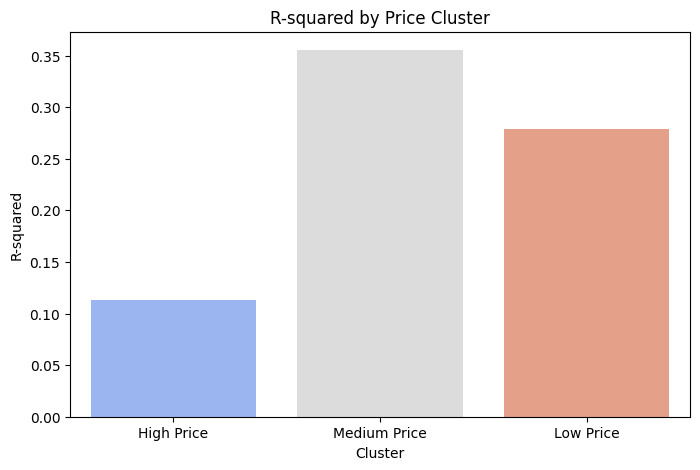

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target
features = ['square_feet', 'bathrooms', 'bedrooms', 'has_fee','photo_available']
target = 'price'

# Initialize results list
results = []

# Loop through each cluster
for cluster in df_ca['price_cluster'].unique():
    print(f"\nRunning regression for cluster: {cluster}")

    # Filter data for the current cluster
    cluster_data = df_ca[df_ca['price_cluster'] == cluster]

    # Check if enough data exists for the cluster
    if cluster_data.shape[0] < 10:
        print(f"Not enough data for cluster: {cluster}")
        continue

    # Define X (features) and y (target)
    X = cluster_data[features]
    y = cluster_data[target]

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
    X = pd.DataFrame(imputer.fit_transform(X), columns=features)

    # Split data into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Cluster': cluster,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    # Print evaluation metrics
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display overall results
print("\nOverall Results by Cluster:")
print(results_df)

# Optional: Visualize R-squared for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='R2', data=results_df, palette='coolwarm')
plt.title('R-squared by Price Cluster')
plt.xlabel('Cluster')
plt.ylabel('R-squared')
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix


model = LinearRegression()
model.fit(X_scaled, y)  # y is your target variable
coefficients = pd.DataFrame({
    'Feature': features,  # List of feature names
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)


           Feature  Coefficient
0      square_feet   128.366438
1        bathrooms   105.586211
4  photo_available    -1.462406
3          has_fee    -9.995362
2         bedrooms   -41.308231


In [39]:
# convert to numeric
df_ca['square_feet'] = pd.to_numeric(df_ca['square_feet'], errors='coerce')
df_ca['bathrooms'] = pd.to_numeric(df_ca['bathrooms'], errors='coerce')
df_ca['bedrooms'] = pd.to_numeric(df_ca['bedrooms'], errors='coerce')
# drop na rows for bed and bath columns
df_ca.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)
# list null counts
df_ca.isnull().sum()

<ipython-input-39-85b7c0e98b96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['square_feet'] = pd.to_numeric(df_ca['square_feet'], errors='coerce')
<ipython-input-39-85b7c0e98b96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['bathrooms'] = pd.to_numeric(df_ca['bathrooms'], errors='coerce')
<ipython-input-39-85b7c0e98b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,0
category,0
title,0
body,0
amenities,1778
bathrooms,0
bedrooms,0
fee,0
has_photo,0
pets_allowed,6506
price,0


In [42]:
from tabulate import tabulate

# Calculate summary statistics for each price cluster
summary_stats = df_ca.groupby('price_cluster')[['bathrooms', 'bedrooms', 'price', 'square_feet']].describe()
print("Summary Statistics by Price Cluster:")
print(tabulate(summary_stats, headers='keys', tablefmt='grid'))

# Compare with other clusters
other_clusters_data = df_ca
summary_comparison = other_clusters_data.groupby('price_cluster')[['price', 'square_feet', 'bathrooms', 'bedrooms']].mean()
print("\nComparison with Other Clusters:")
print(tabulate(summary_comparison, headers='keys', tablefmt='grid'))

Summary Statistics by Price Cluster:
+-----------------+--------------------------+-------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------------+---------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+
| price_cluster   |   ('bathrooms', 'count') |   ('bathrooms', 'mean') |   ('bathrooms', 'std') |   ('bathrooms', 'min') |   ('bathrooms', '25%') |   ('bat